---


**Implementation linear regression without using library**

<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:993: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/usr/local/lib/python3.7/dist-packages/matplotlib/ticker.py:586: UserWarning: Warning: converting a masked element to nan.
  s = self.format % xp


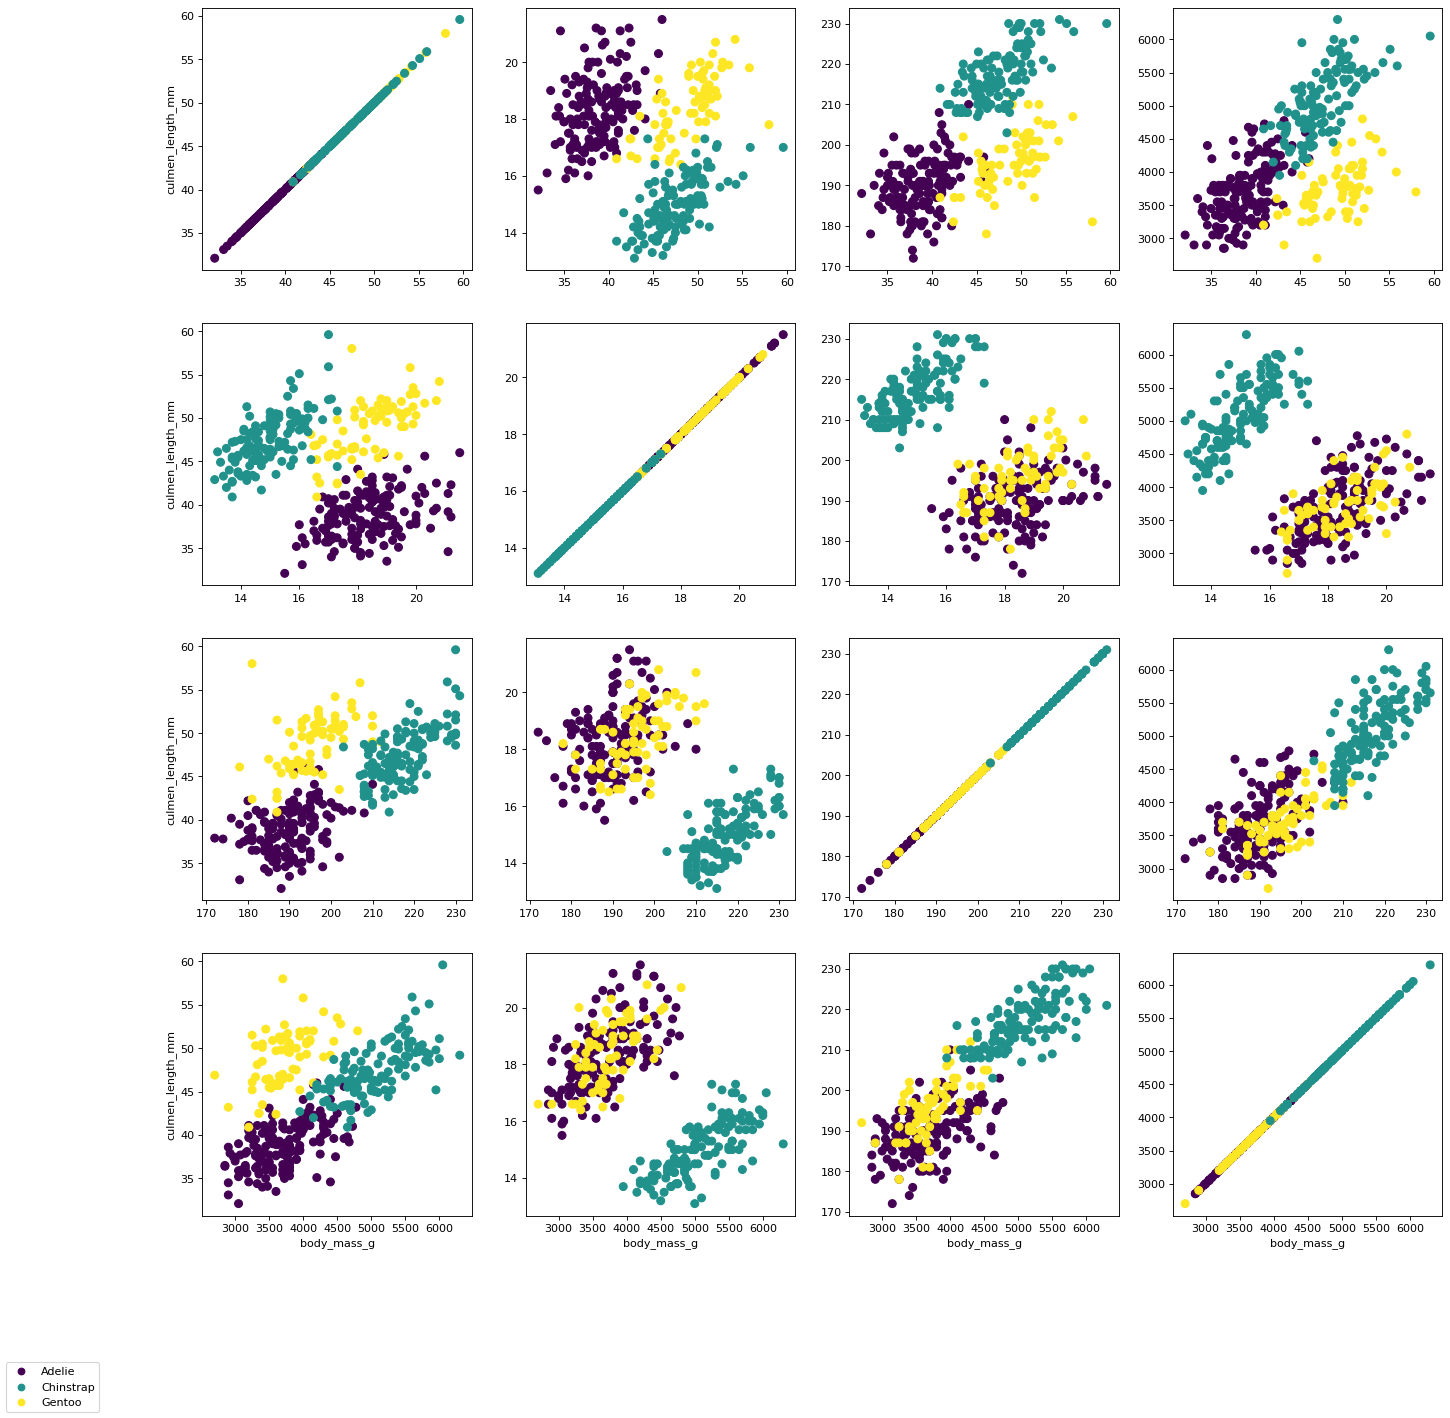

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
df=pd.read_csv("penguins.csv")
features=list(df.columns)[1:]
labels=list(df.columns)[0]
df2=df.copy()
df2['species'].replace(['Adelie', 'Gentoo','Chinstrap'], [0, 1,2], inplace=True)

fig, axis = plt.subplots(len(features), len(features),figsize=(20, 20), dpi=80)
for i in range(len(features)):
    for j in range(len(features)):
      axis[i,j].scatter(df2[features[i]], df2[features[j]], c=df2[labels], s=50)
      if(i==len(features)-1):
        axis[i,j].set_xlabel(features[i])
      if(j==0):
        axis[i,j].set_ylabel(features[j])
fig.legend(handles=scatter.legend_elements()[0], labels=list(df[labels].unique()),loc='lower left')      
      

      

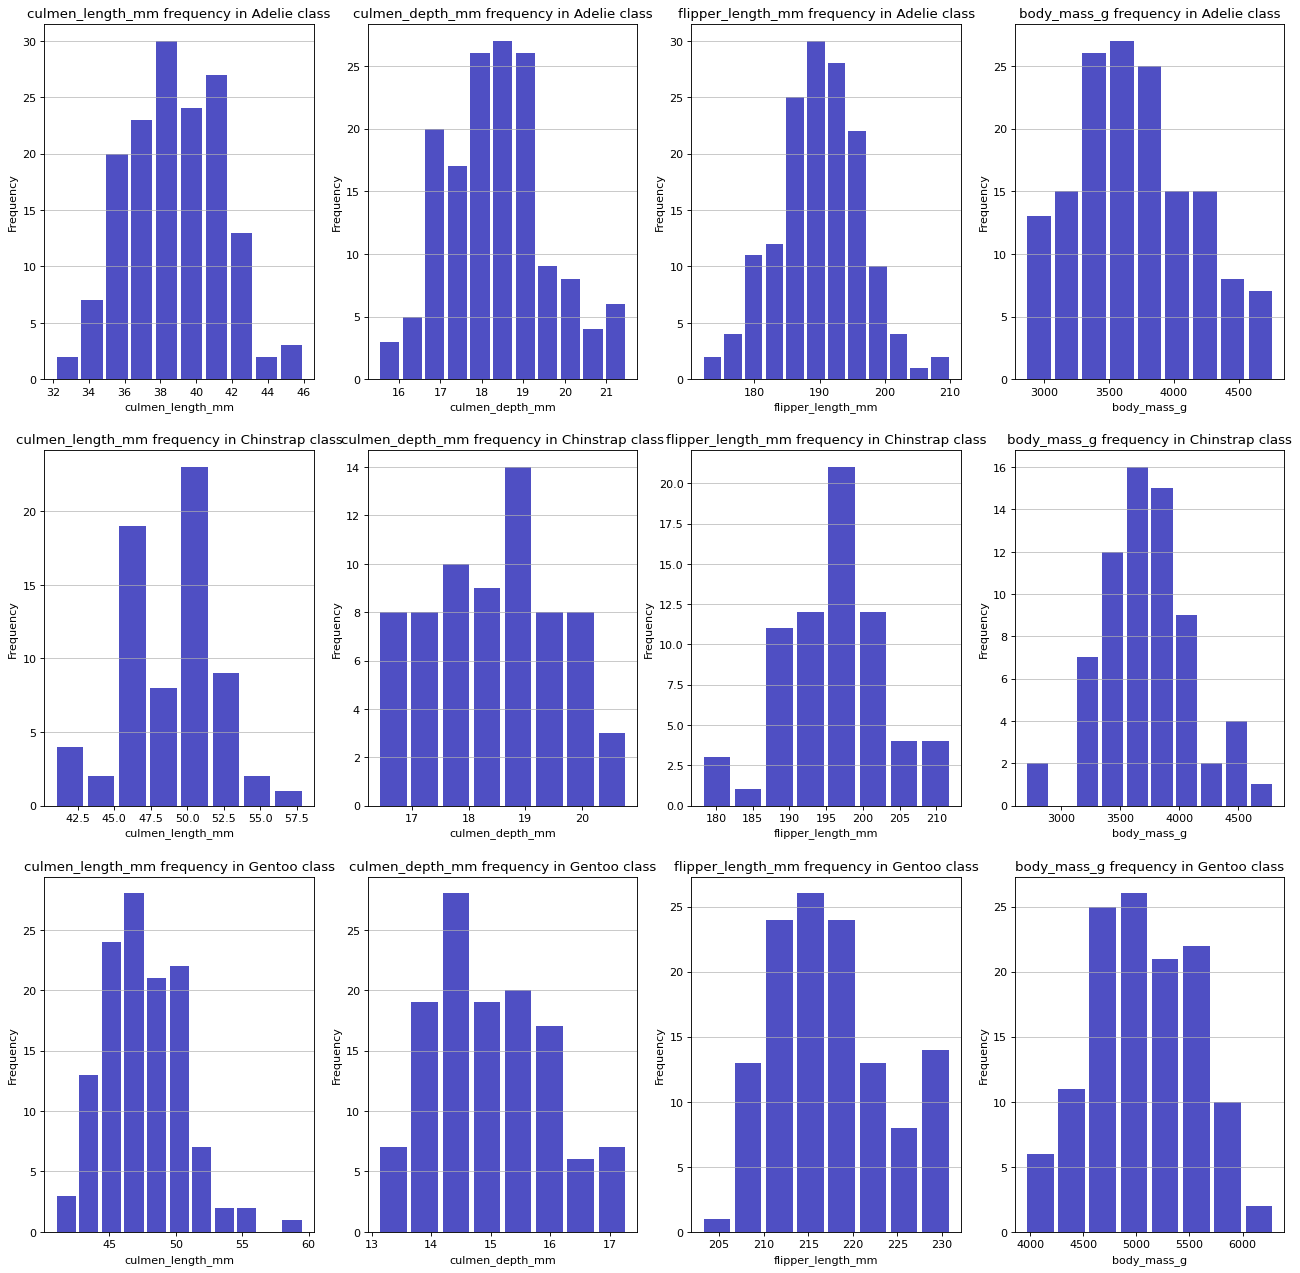

In [117]:
import numpy as np
classes=list(df[labels].unique())
fig, Axis = plt.subplots(len(classes), len(features),figsize=(20, 20), dpi=80)
k=0
m=0
for i in classes:
  temp_df=df[df[labels]==i]
  k=0
  for j in features:
    n, bins, patches = Axis[m,k].hist(x=temp_df[j], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
    Axis[m,k].grid(axis='y', alpha=0.75)
    Axis[m,k].set_xlabel('{}'.format(j))
    Axis[m,k].set_ylabel('Frequency')
    Axis[m,k].set_title('{} frequency in {} class'.format(j,i))
    #plt.show()
    k=k+1
  m=m+1

In [118]:
df.dropna(thresh=len(features))
for i in features:
  df[i] = df[i]. fillna(df[i]. mean())
normalized_df=(df-df.mean())/df.std()
data=normalized_df[normalized_df.columns.drop(labels)].values
tags=df[labels].values
data = data.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [119]:
import random 
import math
import numpy as np
def test_train_split(data,tags,percent):
  shuffler = np.random.permutation(len(data))
  data_shuffled = data[shuffler]
  tags_shuffled = tags[shuffler]
  x_train=data_shuffled[:int(len(data)*percent)]
  y_train=tags_shuffled[:int(len(data)*percent)]
  x_test=data_shuffled[int(len(data)*percent)+1:]
  y_test=tags_shuffled[int(len(data)*percent)+1:]
  return x_train,y_train,x_test,y_test
x_train,y_train,x_test,y_test=test_train_split(data,tags,0.7)
#x_train,y_train,x_test,y_test=test_train_split(data,tags,0.7)

In [120]:
def sigmoid(x):
     return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
     return x * (1 - x)

class logigisitcRegression():
  def __init__(self,data,tags):
    self.n_samples,self.n_features=data.shape
    self.n_classes=np.unique(tags)
    self.X=data
    self.train_data=[]
    self.train_tags=[]
    self.trained_parameters=[]

    if(len(self.n_classes)>2):
      for i in self.n_classes:
        y=tags.copy()
        y[tags!=i]=0
        y[tags==i]=1
        y=np.array(y, dtype=float)
        y=np.reshape(y, (self.n_samples, 1))
        self.train_tags.append(y)
  def fit(self,iter,lr):
    cost_values=[]
    cost_values = []
    if (len(self.n_classes)>2):
      for i in range(len(self.n_classes)):
        weights=np.random.rand(self.n_features,1)
        bias=0
        for _ in range(iter):
          z = np.dot(self.X,weights) + bias 
          hypothesis = sigmoid(z) 
          j = 1/self.n_samples*(-1*(np.sum(self.train_tags[i]*np.log(hypothesis) + (1-self.train_tags[i])*np.log(1-hypothesis))))
          dw =  1/self.n_samples * np.dot(self.X.T,hypothesis-self.train_tags[i])
          db =  1/self.n_samples * np.sum(hypothesis-self.train_tags[i])
          weights = weights - lr*dw
          bias = bias - lr*db
        cost_values.append(j)  
        self.trained_parameters.append([weights,bias])
    return cost_values,self.trained_parameters
  def score(self,X,Y):
    k=0
    for i in range(len(X)):
      pred=self.predict(X[i])
      if(pred==Y[i]):
        k=k+1
    return k/len(X)
  def predict(self,x_test):
    y_pre=[]
    for i in self.trained_parameters:
      z = np.dot(x_test.T,i[0]) + i[1] 
      hypothesis = sigmoid(z)
      y_pre.append(hypothesis)
    return self.n_classes[np.argmax(y_pre)]
lrclassifier=logigisitcRegression(x_train,y_train)    
Wb,d=lrclassifier.fit(10000,0.01)

In [121]:
print("Acruuracy on train is: ", lrclassifier.score(x_train,y_train))
print("Acruuracy on test is: ", lrclassifier.score(x_test,y_test))

Acruuracy on train is:  0.9791666666666666
Acruuracy on test is:  0.9902912621359223


In [90]:
ypred=[]
for i in x_train:
  ypred.append(lrclassifier.predict(i))

In [91]:
def confusion_matrix(true_classes,predicted_classes):
  classes = set(true_classes)
  number_of_classes = len(classes)

  conf_matrix = pd.DataFrame(
      np.zeros((number_of_classes, number_of_classes),dtype=int),
      index=classes,
      columns=classes)

  for true_label, prediction in zip(true_classes ,predicted_classes):
      # Each pair of (true_label, prediction) is a position in the confusion matrix (row, column)
      # Basically here we are counting how many times we have each pair.
      # The counting will be placed at the matrix index (true_label/row, prediction/column)
  
      conf_matrix.loc[true_label, prediction] += 1

  return conf_matrix.values
def my_jaccard_score(y_true,y_pred):
    score=[]
    n_classes=np.unique(y_true)
    matrix=confusion_matrix(y_true,y_pred)
    for i in range(len(n_classes)):
      score.append(matrix[i,i]/(sum(matrix[i,:])+sum(matrix[:,i])-matrix[i,i]))
    return score

def Precision(y_true,y_pred):
    score=[]
    n_classes=np.unique(y_true)
    matrix=confusion_matrix(y_true,y_pred)
    for i in range(len(n_classes)):
      score.append(matrix[i,i]/(sum(matrix[:,i])))
    return score
def Recall(y_true,y_pred):
    score=[]
    n_classes=np.unique(y_true)
    matrix=confusion_matrix(y_true,y_pred)
    for i in range(len(n_classes)):
      score.append(matrix[i,i]/(sum(matrix[i,:])))
    return score
def f1score(p,r):
  f1=[]
  #F1 = 2 * (p * r) / (p + r)
  for i in range(len(p)):
    f1.append(2 * (p[i] * r[i]) / (p[i] + r[i]))
  return f1

In [92]:
print("The jaccard score for train data is: ", my_jaccard_score(y_train,ypred))
p=Precision(y_train,ypred)
print("The precision score for train data is: ", p)
r=Recall(y_train,ypred)
print("The recall score for train data is: ", r)
print("The f1-score for train data is: ", f1score(p,r))
print(confusion_matrix(y_train,ypred))

The jaccard score for train data is:  [0.9646017699115044, 0.9285714285714286, 0.9887640449438202]
The precision score for train data is:  [0.9646017699115044, 1.0, 1.0]
The recall score for train data is:  [1.0, 0.9285714285714286, 0.9887640449438202]
The f1-score for train data is:  [0.9819819819819819, 0.962962962962963, 0.9943502824858756]
[[109   0   0]
 [  3  39   0]
 [  1   0  88]]


In [93]:
ypred=[]
for i in x_test:
  ypred.append(lrclassifier.predict(i))
print("The jaccard score is: ", my_jaccard_score(y_test,ypred))
p=Precision(y_test,ypred)
print("The precision score is: ", p)
r=Recall(y_test,ypred)
print("The recall score is: ", r)
print("The f1-score is: ", f1score(p,r))
print(confusion_matrix(y_test,ypred))

The jaccard score is:  [0.9545454545454546, 0.9230769230769231, 1.0]
The precision score is:  [0.9545454545454546, 1.0, 1.0]
The recall score is:  [1.0, 0.9230769230769231, 1.0]
The f1-score is:  [0.9767441860465117, 0.9600000000000001, 1.0]
[[42  0  0]
 [ 2 24  0]
 [ 0  0 35]]


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
df=pd.read_csv("penguins.csv")
df.dropna(thresh=len(features))
for i in features:
  df[i] = df[i]. fillna(df[i]. mean())
tags=df[labels].values
data=df[df.columns.drop(labels)].values
X_train, X_test, y_train, y_test = train_test_split(data, tags, test_size=0.3)

In [104]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
print("Accuracy on train data:", clf.score(X_train, y_train))
y_pred=clf.predict(X_test)
print("Accuracy on test data:", clf.score(X_test, y_pred))

Accuracy on train data: 0.9875
Accuracy on test data: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [105]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
print("The jaccard score for test data is:", jaccard_score(y_test,y_pred,average=None))
print("The precision score for test data is:",precision_score(y_test,y_pred,average=None))
print("The recall score for test data is:",recall_score(y_test,y_pred,average=None))
print("The f1_score for test data is:",f1_score(y_test,y_pred,average=None))
confusion_matrix(y_test, y_pred)

The jaccard score for test data is: [0.96078431 0.94444444 0.97297297]
The precision score for test data is: [0.96078431 1.         1.        ]
The recall score for test data is: [1.         0.94444444 0.97297297]
The f1_score for test data is: [0.98       0.97142857 0.98630137]


array([[49,  0,  0],
       [ 1, 17,  0],
       [ 1,  0, 36]])

In [106]:
y_pred=clf.predict(X_train)
print("The jaccard score is:", jaccard_score(y_train,y_pred,average=None))
print("The precision score is:",precision_score(y_train,y_pred,average=None))
print("The recall score is:",recall_score(y_train,y_pred,average=None))
print("The f1_score is:",f1_score(y_train,y_pred,average=None))
confusion_matrix(y_train, y_pred)

The jaccard score is: [0.97115385 0.96078431 0.98863636]
The precision score is: [0.99019608 0.98       0.98863636]
The recall score is: [0.98058252 0.98       1.        ]
The f1_score is: [0.98536585 0.98       0.99428571]


array([[101,   1,   1],
       [  1,  49,   0],
       [  0,   0,  87]])

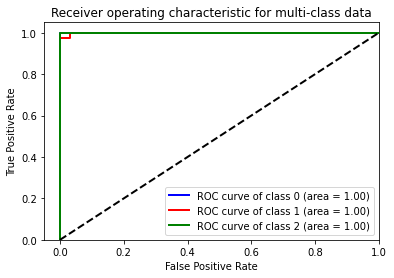

the areas under the curve is {0: 1.0, 1: 0.999231950844854, 2: 1.0}


In [107]:
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
classes=["Gentoo", "Adelie", "Chinstrap"]
y = label_binarize(tags, classes=["Gentoo", "Adelie", "Chinstrap"])
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3)
n_classes = y.shape[1]

classifier = OneVsRestClassifier(LogisticRegression())
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()
print("the areas under the curve is",roc_auc)